<a href="https://colab.research.google.com/github/emilyswitzer/celeb-heights/blob/main/maskrcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mask R-CNN Training (Demo)


This notebook shows how to train Mask R-CNN ([by Matterport](https://github.com/matterport/Mask_RCNN)) on your own dataset.
This is a demo version which allows you to train your detector for 1 class.

The full tutorial is available here: [Tutorial](https://pysource.com/2021/08/10/train-mask-r-cnn-for-image-segmentation-online-free-gpu)

---

**With the FULL VERSION YOU CAN:**
- Train for multiple classes
- Improve accuracy (longer training and bigger images)
- Import the custom detector on Python with Opencv
- Run detector in realtime on a Video or from a Webcam
- Continue the training (if interrupted)
- Integration with Google Drive (to save there weigths and images)
- Evaluate the accuracy of your Model

You can get the FULL Version here: [Mask RCNN PRO](https://pysource.com/mask-rcnn-training-pro/)

---





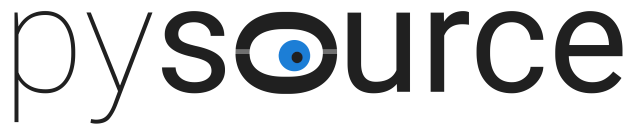

## **1. Installation**

In [ ]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!wget https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
!unzip Mask_RCNN_basic_1.zip
import sys
sys.path.append("/content/Mask_RCNN/mrcnn")
from m_rcnn import *
from visualize import random_colors, get_mask_contours, draw_mask
%matplotlib inline

TensorFlow 1.x selected.
     |████████████████████████████████| 2.9 MB 4.4 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
--2022-02-21 17:24:35--  https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
Resolving pysource.com (pysource.com)... 104.21.67.193, 172.67.180.33, 2606:4700:3031::6815:43c1, ...
Connecting to pysource.com (pysource.com)|104.21.67.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1282557 (1.2M) [application/zip]
Saving to: ‘Mask_RCNN_basic_1.zip’

Mask_RCNN_basic_1.z 100%[===================>]   1.22M  --.-KB/s    in 0.05s   

2022-02-21 17:24:35 (25.0 MB/s) - ‘Mask_RCNN_basic_1.zip’ saved [1282557/1282557]

Archive:  Mask_RCNN_basic_1.zip
   creating: Mask_RCNN/
  inflating: Mask_RCNN/.gitignore    
   creating: Mask_RCNN/assets/
   creating: Mask_RCNN/images/
  inflating: Mask_RCNN/LICENSE       
  inflating: Mask_RCNN/MANIFEST.in 

Using TensorFlow backend.


... done downloading pretrained model!


## **2. Run Mask-RCNN on Images**

You can load here the image and extract the mask using Mask-RCNN


In [ ]:
# Extract Images
!unzip "/content/Archive.zip" -d "/content/182"


Archive:  /content/Archive.zip
  inflating: /content/182/Adrian Lester.jpg  
  inflating: /content/182/__MACOSX/._Adrian Lester.jpg  
  inflating: /content/182/Alan Alda.jpg  
  inflating: /content/182/__MACOSX/._Alan Alda.jpg  
  inflating: /content/182/Alistair Appleton.jpg  
  inflating: /content/182/__MACOSX/._Alistair Appleton.jpg  
  inflating: /content/182/Andrew Rannells.jpg  
  inflating: /content/182/__MACOSX/._Andrew Rannells.jpg  
  inflating: /content/182/Anwar Hadid.jpg  
  inflating: /content/182/__MACOSX/._Anwar Hadid.jpg  
  inflating: /content/182/Ava Michelle Cota.jpg  
  inflating: /content/182/__MACOSX/._Ava Michelle Cota.jpg  
  inflating: /content/182/Bill Murray.jpg  
  inflating: /content/182/__MACOSX/._Bill Murray.jpg  
  inflating: /content/182/Bill Pullman.jpg  
  inflating: /content/182/__MACOSX/._Bill Pullman.jpg  
  inflating: /content/182/Brett Gelman.jpg  
  inflating: /content/182/__MACOSX/._Brett Gelman.jpg  
  inflating: /content/182/Brian J White.jp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import io
import glob
images = glob.glob("/content/*.jpg")

for image in images:
    with open(image, 'rb') as file:
        img = cv2.imread(image)
        test_model, inference_config = load_inference_model(1, "/content/drive/MyDrive/Colab Notebooks/working_folder/mask_rcnn_object_0005.h5")
        image2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect results
        r = test_model.detect([image2])[0]
        colors = random_colors(80)
        object_count = len(r["class_ids"])
        for i in range(object_count):
            # 1. Mask
            mask = r["masks"][:, :, i]
            contours = get_mask_contours(mask)
            for cnt in contours:
                cv2.polylines(img, [cnt], True, colors[i], 2)
                img = draw_mask(img, [cnt], colors[i])


                output_image_path = os.path.join("/content/*.jpg", image)
                Image.fromarray(img.astype(np.uint8)).save(output_image_path)
  

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/drive/MyDrive/Colab Notebooks/working_folder/mask_rcnn_object_0005.h5

Loading weights from  /content/drive/MyDrive/Colab Notebooks/working_folder/mask_rcnn_object_0005.h5
Loading weights from  /content/drive/MyDrive/Colab Notebooks/working_folder/mask_rcnn_object_0005.h5
Loading weights from  /content/drive/MyDrive/Colab Notebooks/working_folder/mask_rcnn_object_0005.h5
Loading weights from  /content/drive/MyDrive/Colab Notebooks/working_folder/mask_rcnn_object_0005.h5
Loading weights from  /content/drive/MyDrive/Colab Notebooks/working_folder/mask_rcnn_object_0005.h5
Loading weights from  /content/drive/MyDrive/Colab Notebooks/working_folder/mask_rcnn_obje

InternalError: ignored

In [ ]:
!zip -r /content/182.zip /content/182/182



  adding: content/182/182/ (stored 0%)
  adding: content/182/182/Rick Yune.jpg (deflated 1%)
  adding: content/182/182/Jonathan Silverman.jpg (deflated 1%)
  adding: content/182/182/Marjean Holden.jpg (deflated 1%)
  adding: content/182/182/Marque Richardson.jpg (deflated 0%)
  adding: content/182/182/Tanc Sade.jpg (deflated 1%)
  adding: content/182/182/Steven Weber.jpg (deflated 1%)
  adding: content/182/182/Lance Gross.jpg (deflated 1%)
  adding: content/182/182/Kerry Cahill.jpg (deflated 1%)
  adding: content/182/182/Petra Kvitova.jpg (deflated 0%)
  adding: content/182/182/Kristen Johnston.jpg (deflated 1%)
  adding: content/182/182/Sung Kang.jpg (deflated 0%)
  adding: content/182/182/Damian McGinty.jpg (deflated 1%)
  adding: content/182/182/Natalie Pack.jpg (deflated 0%)
  adding: content/182/182/Pip Torrens.jpg (deflated 1%)
  adding: content/182/182/Kane Brown.jpg (deflated 1%)
  adding: content/182/182/Omar Gooding.jpg (deflated 1%)
  adding: content/182/182/Curtis Jackson 5

In [ ]:
for image in images:
    filename = os.path.join(cop_folder, image)
    move_file(filename, destination_folder)